In [1]:
import biom

import pandas as pd

from qiime2 import Artifact

from qiime2.plugins import metadata

import seaborn as sns

import skbio
from skbio.stats.distance import MissingIDError
from skbio import DistanceMatrix

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import csv
import qiime2 as q2

from qiime2.plugins.sample_classifier.pipelines import classify_samples

from qiime2.plugins.feature_table.methods import filter_samples

from qiime2.plugins.sample_classifier.methods import predict_classification

from qiime2.plugins.sample_classifier.visualizers import confusion_matrix

import os

/anaconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ten

In [2]:
combined_predictions = pd.read_csv('predictions.tsv', sep='\t').set_index('Unnamed: 0')

In [3]:
overall_accuracies = combined_predictions[combined_predictions.stat.isin(['Overall Accuracy'])]

In [4]:
overall_accuracies.head()

,preservation,temperature,duration,stat,Overall Accuracy
Unnamed: 0,,,,,
0,70etoh,20C,8weeks,Overall Accuracy,1.0
3,70etoh,20C after one week,4weeks,Overall Accuracy,1.0
6,70etoh,20C after one week,8weeks,Overall Accuracy,1.0
9,70etoh,4C,1week,Overall Accuracy,1.0
12,70etoh,4C,4weeks,Overall Accuracy,1.0


In [13]:
etoh70 = overall_accuracies[[preservation]==['70etoh']]

NameError: name 'preservation' is not defined

In [9]:
etoh70.head()

AttributeError: 'list' object has no attribute 'head'

In [4]:
def fancyplot(df):
    g = sns.catplot(data=df, x='duration', y='Overall Accuracy', 
                    hue='temperature', col='preservation',
                    col_wrap=3, 
                    order=['fresh', '1week', '4weeks', '8weeks'],
                    linewidth=1.5,
                    dodge=True,
                    s=15)
                    #palette=sns.color_palette("RdBu_r", 7))

    g.set_axis_labels("Duration of Storage", "Classification Accuracy")
    g.set_xticklabels(["Fresh", "1 week", "4 weeks", "8 weeks"])
    g.set_titles("{col_name}")
    g._legend.set_title("Temperature Treatment")

    new_labels = ['−20C', '−20C after one week','4C','Ambient','Freeze-thaw','Heat']
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)

    for ax in g.axes.flat:
        ax.set_title(ax.get_title(), fontsize='xx-large')
        ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
        ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
        ax.set_xticklabels(ax.get_xticklabels(), fontsize='x-large')
        ax.set(ylim=(0.7, 1.15))
    
    return g

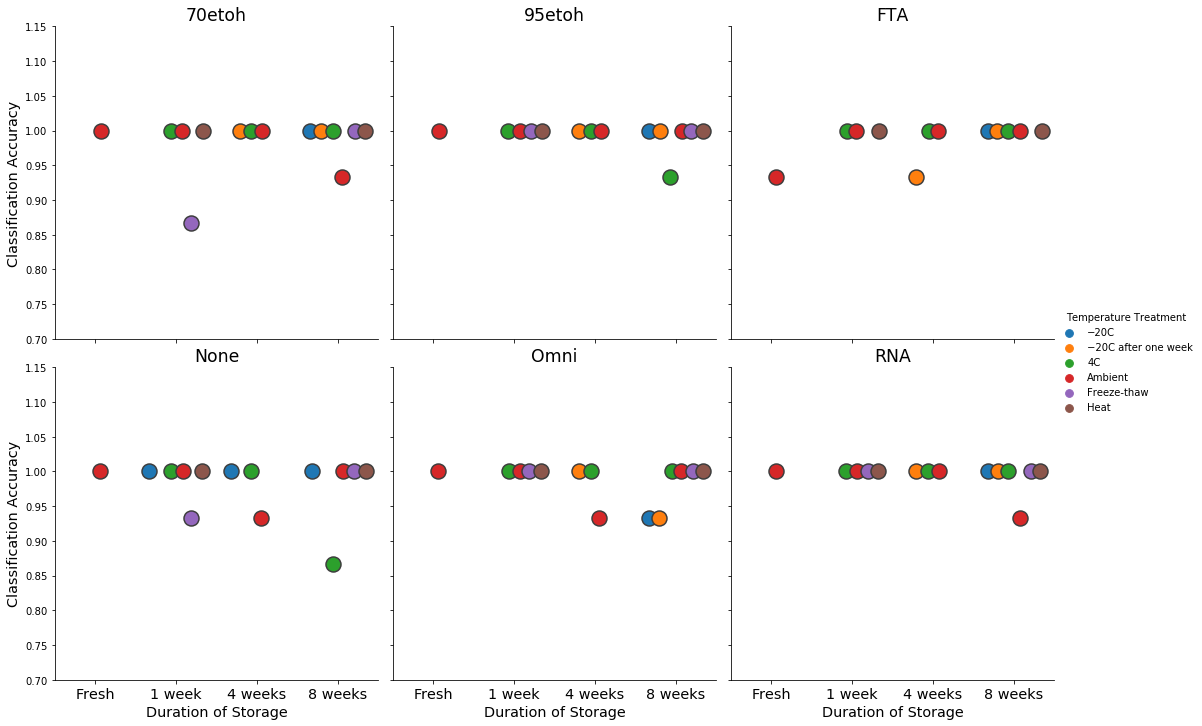

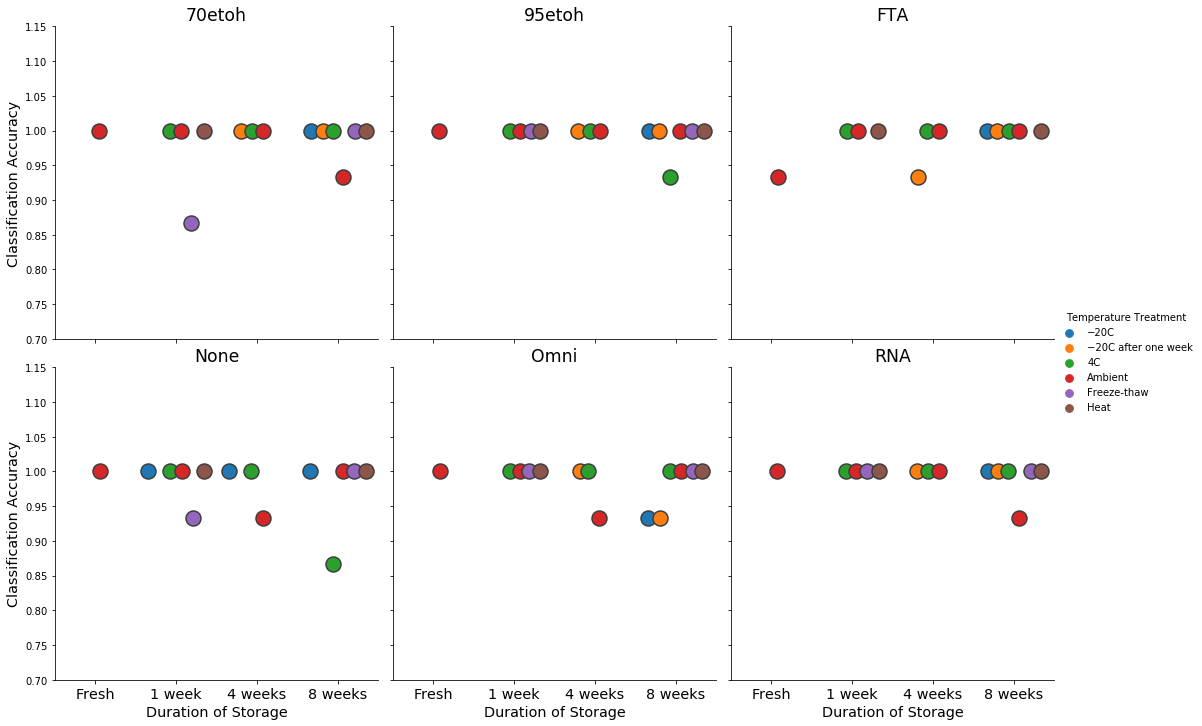

In [6]:
fancyplot(overall_accuracies).savefig('predictions.png')
fancyplot(overall_accuracies).savefig('predictions.svg', format='svg', dpi=1200)